In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [28]:

def resample_cumulative(df):
    """
    """
    df = df.set_index("date", drop = True)
    df = df.resample("10T").last()
    df["value"] = df["value"].diff()*6
    df = df.fillna(0)
    return df

def resample_continuous(df):
    df = df.set_index("date", drop = True)
    return df.resample("10T").mean()


def clean_continuous(filename, name, start, stop):
    df = pd.read_csv(filename, parse_dates= [["date", "time"]]).rename(columns={"date_time":"date"})
    df = resample_continuous(df)
    df = df.rename(columns={"value":name})
    return df[(df.index >= start) &(df.index < stop)]


def clean_cumulative(filename, name, start, stop):
    df = pd.read_csv(filename, parse_dates= [["date", "time"]]).rename(columns={"date_time":"date"})
    df = resample_cumulative(df)
    df = df.rename(columns={"value":name})
    return df[(df.index >= start) &(df.index < stop)]
    
    
    

In [32]:
start = datetime(2021, 3, 28)
stop = datetime(2021, 4, 8)

path = "./08.04_collected"

filenames_cont = ["air_temp.csv",  "GHI.csv", "PAI.csv"]
filenames_cum = ["load.csv", "PV.csv"]

column_names_cont = ["airTemp", "GHI", "PAI"]
column_names_cum = ["L", "PV"]


air_temp, GHI, PAI = [ clean_continuous(os.path.join(path, filenames_cont[i]), column_names_cont[i], start, stop) for i in range(len(filenames_cont))]
L, PV = [clean_cumulative(os.path.join(path, filenames_cum[i]), column_names_cum[i], start, stop) for i in range(len(filenames_cum))]



df = pd.concat([air_temp, GHI, PAI, L, PV], axis =1)

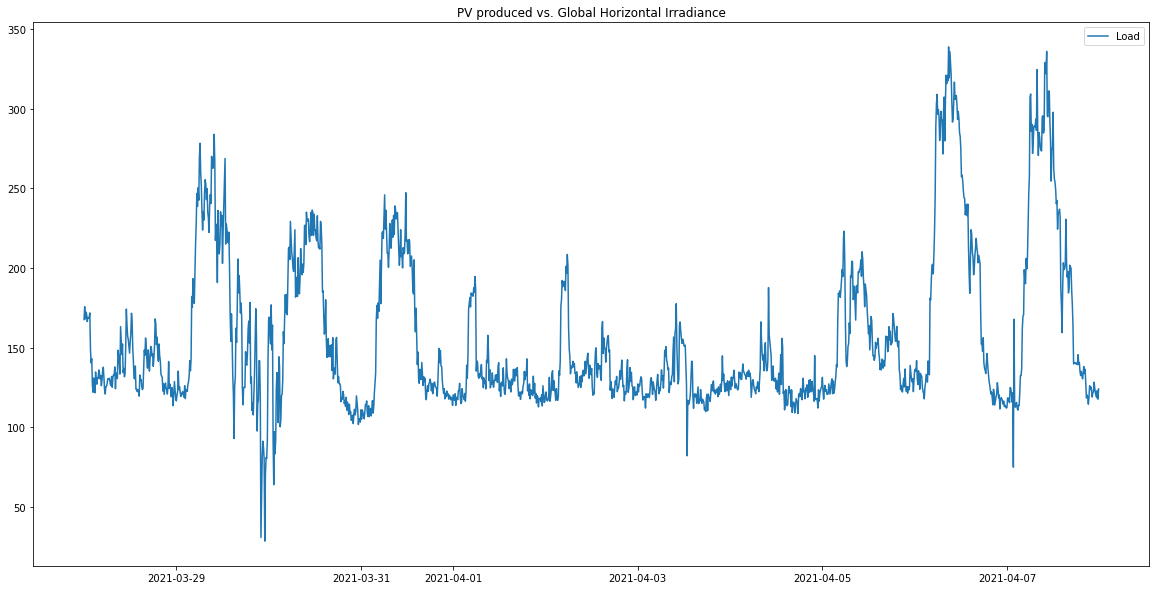

In [33]:
plt.figure(figsize=(20, 10))
#plt.plot(df.index, df.PV, label = "PV")
#plt.plot(df.index, df.GHI, label = "GHI")
plt.plot(df.index, df.L, label = "Load")
plt.legend()
plt.title("PV produced vs. Global Horizontal Irradiance")
plt.show()

In [34]:
df.to_csv("../../src/data/08.04_test.csv")